In [29]:
#load the dataset
data = pd.read_csv(r'D:\Users\UDCSI-WS-016\Downloads\ML_Project\vgsales\vgsales.csv') 
data.head()

<IPython.core.display.Javascript object>

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.shape 

(16598, 11)

In [30]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [31]:
data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Year', ylabel='Count'>

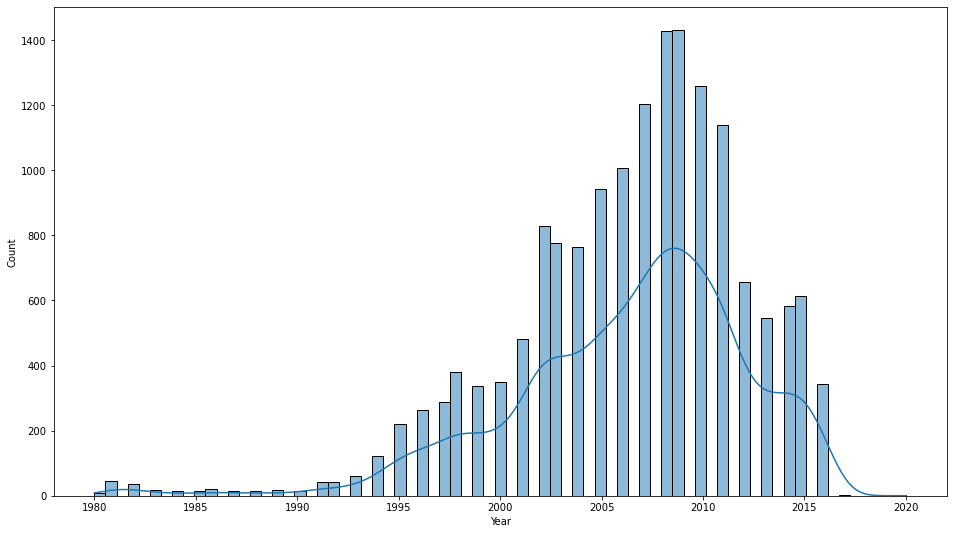

In [12]:
#fill the misisng value
plt.figure(figsize=(16,9))
sns.histplot(data,x = data.Year,kde = True)

In [16]:
data.Year = data.Year.fillna(data.Year.mean())

In [17]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

But Above to Missing Value Column we are not useing to Train Our Model 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Top 10 Categories of Games Sold')

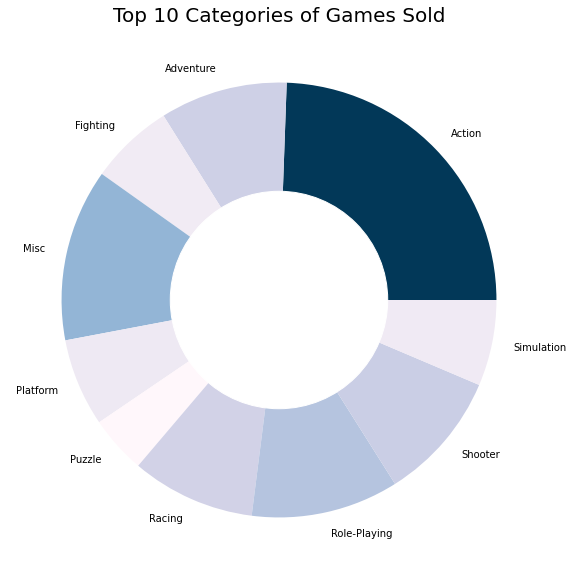

In [20]:
%matplotlib inline
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(16,10))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

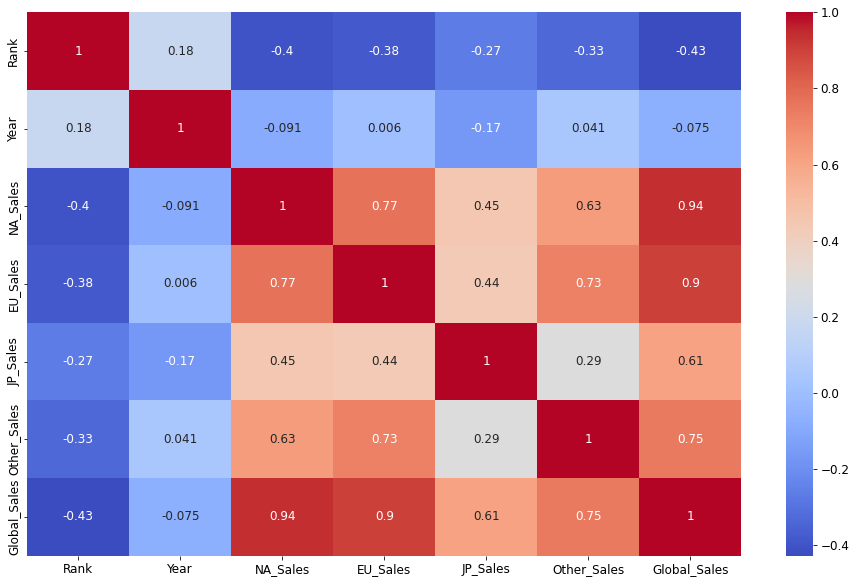

In [23]:
#now check the correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot = True,cmap="coolwarm")

In [24]:
#now the feature selection 
x = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

now the check the data distribution so that - so here we go 

In [25]:
def check_gaussain(data,feature):
    try:
        import scipy.stats as stat 
        import pylab 
        plt.figure(figsize=(20,15))
        plt.subplot(1,2,1)
        #data[feature].hist()
        sns.histplot(data,x=data[feature])
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.show() 
    except Exception as Ex:
        return Ex

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

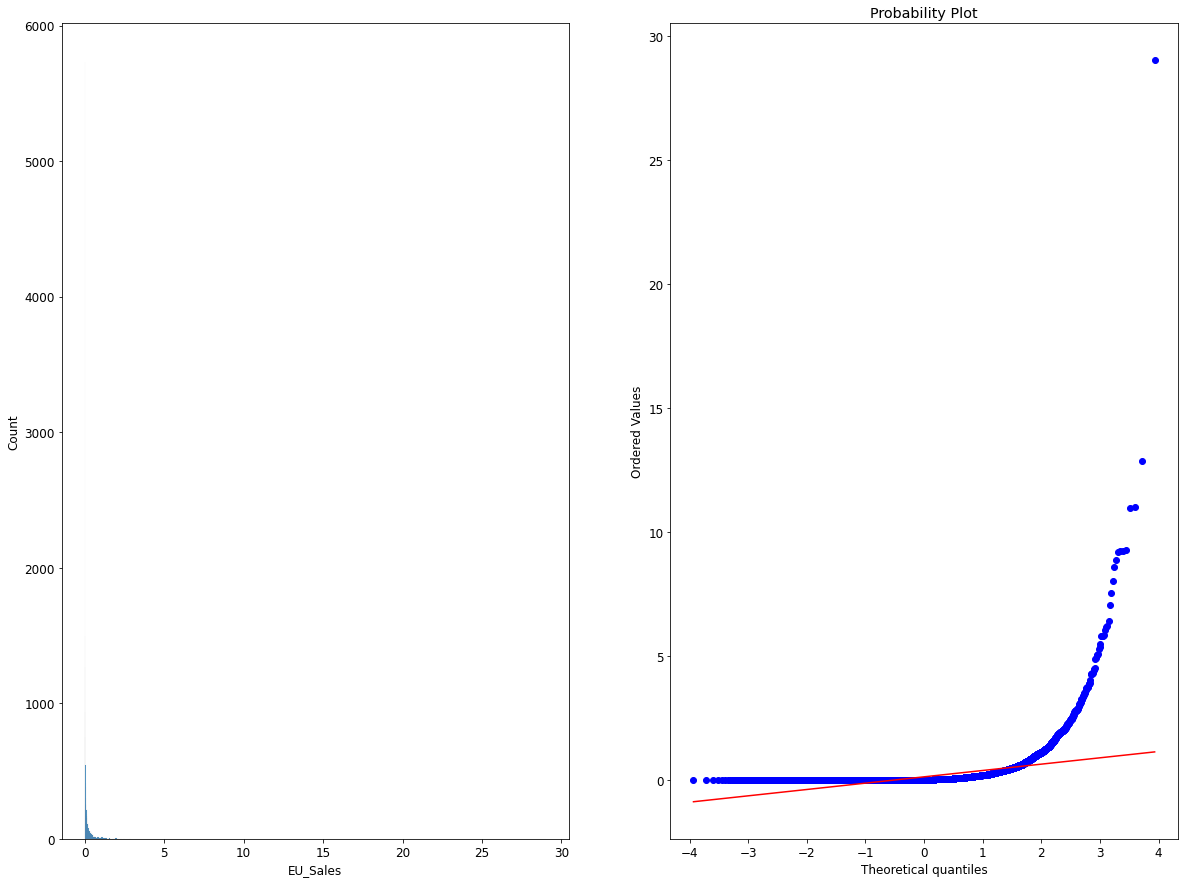

In [32]:
check_gaussain(data,'EU_Sales')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

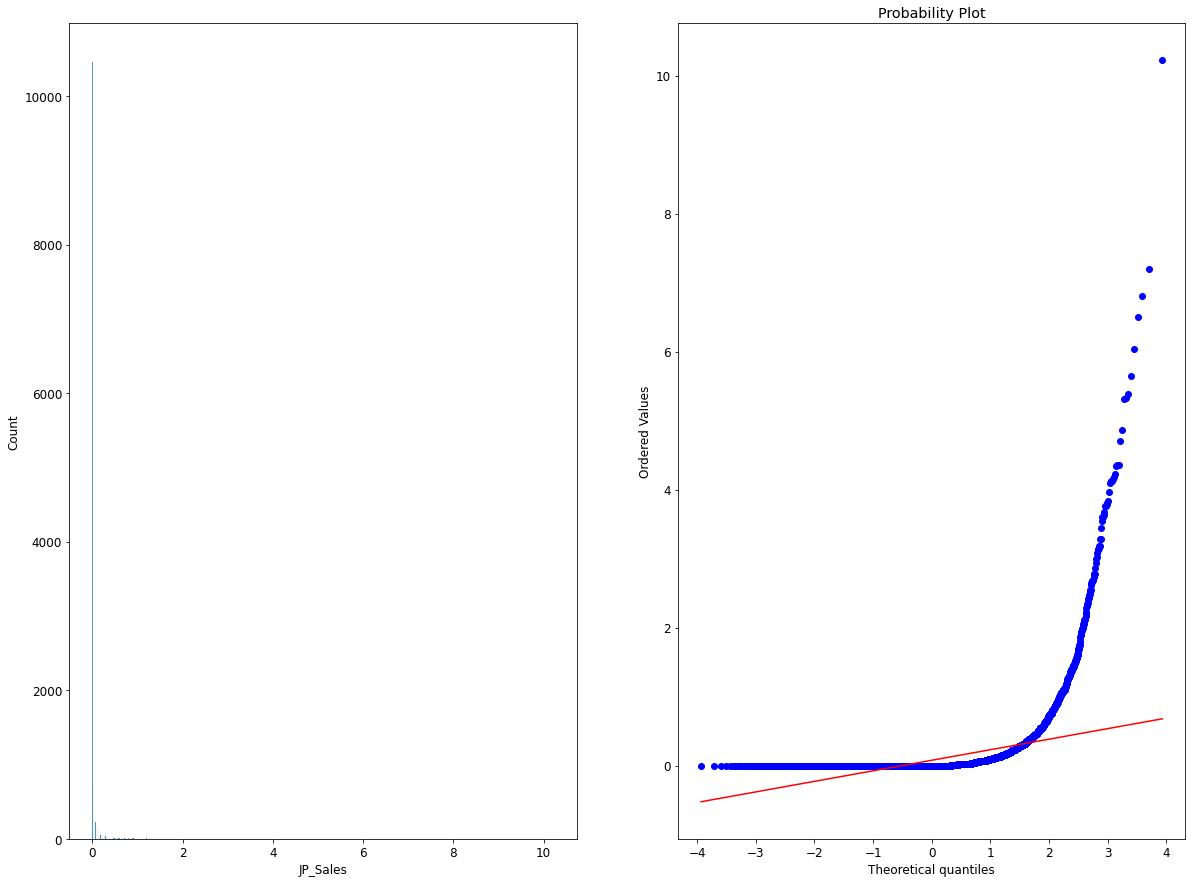

In [33]:
check_gaussain(data,'JP_Sales')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

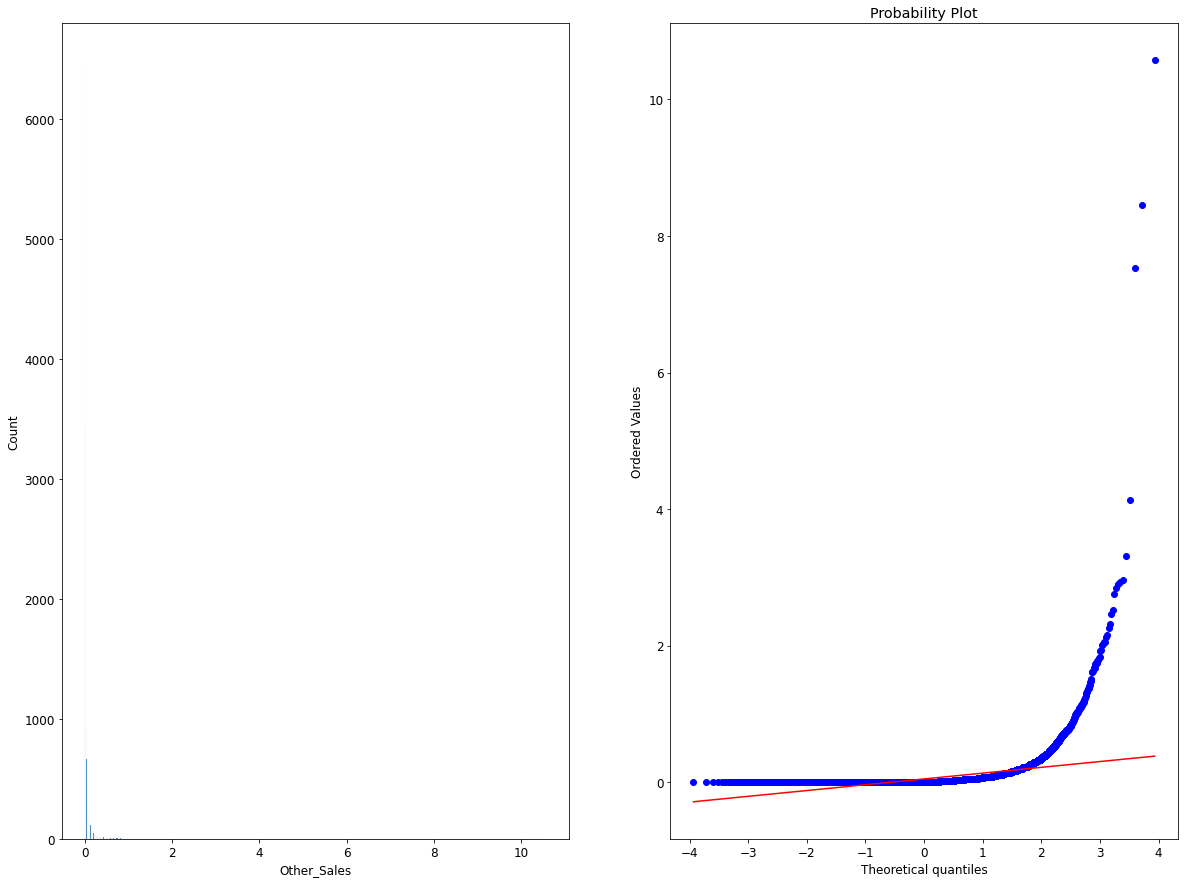

In [34]:
check_gaussain(data,'Other_Sales')

Now we are try to convert Gussain Distribution So that we are using Few Transformation like Logarethemic or Boxcox Transformation --- Here we go

In [43]:
data['Others_Sale_Log'] = np.log(data.Other_Sales)+1

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<IPython.core.display.Javascript object>

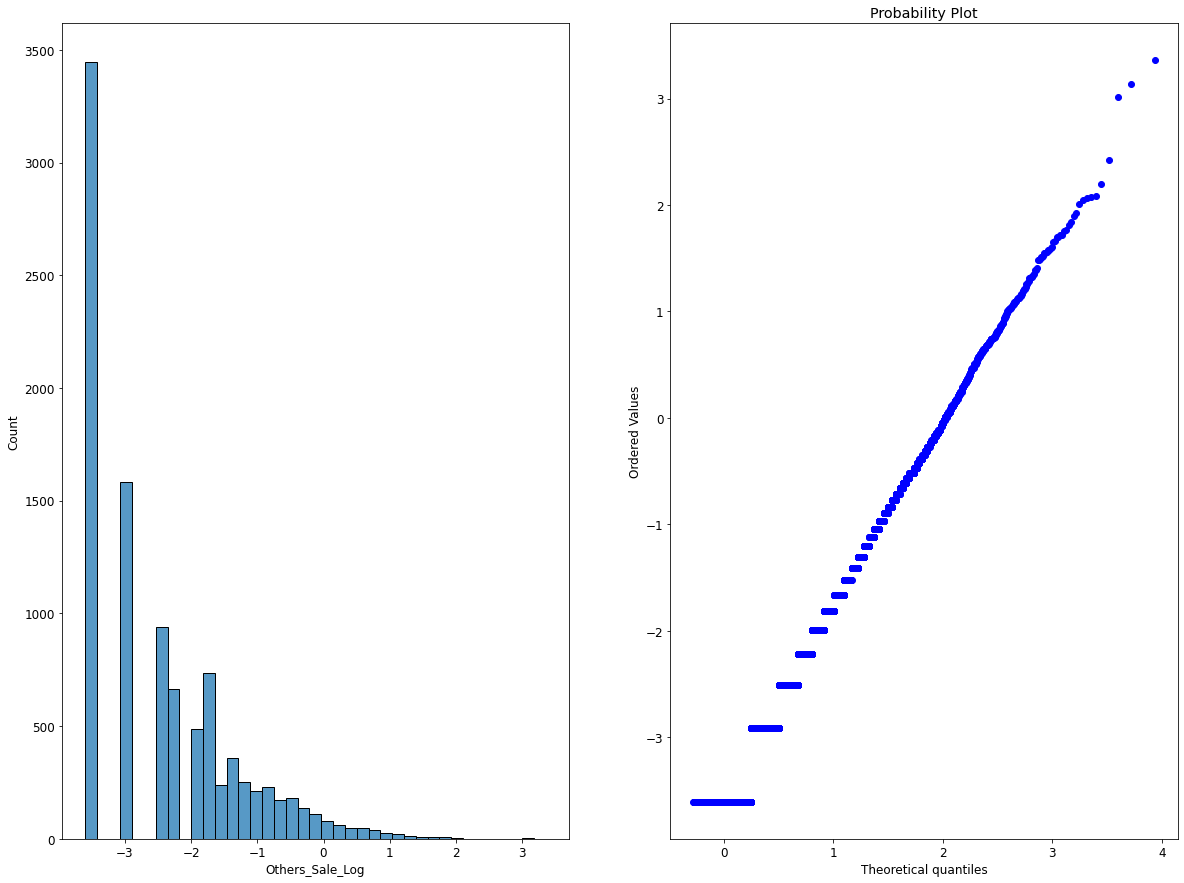

In [44]:
check_gaussain(data,'Others_Sale_Log')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

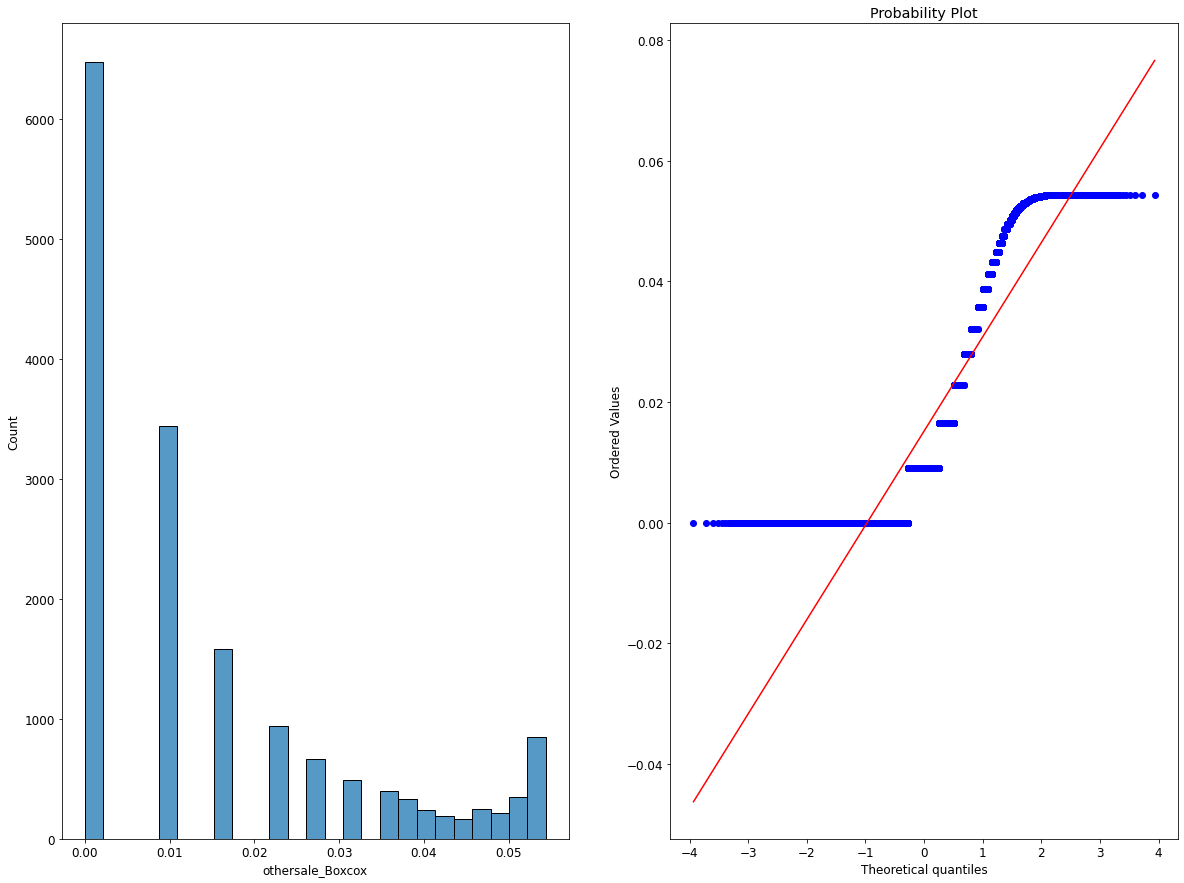

In [41]:
import scipy.stats as stat 
data['othersale_Boxcox'],parameters=stat.boxcox(data['Other_Sales']+1)
check_gaussain(data,'othersale_Boxcox')

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<IPython.core.display.Javascript object>

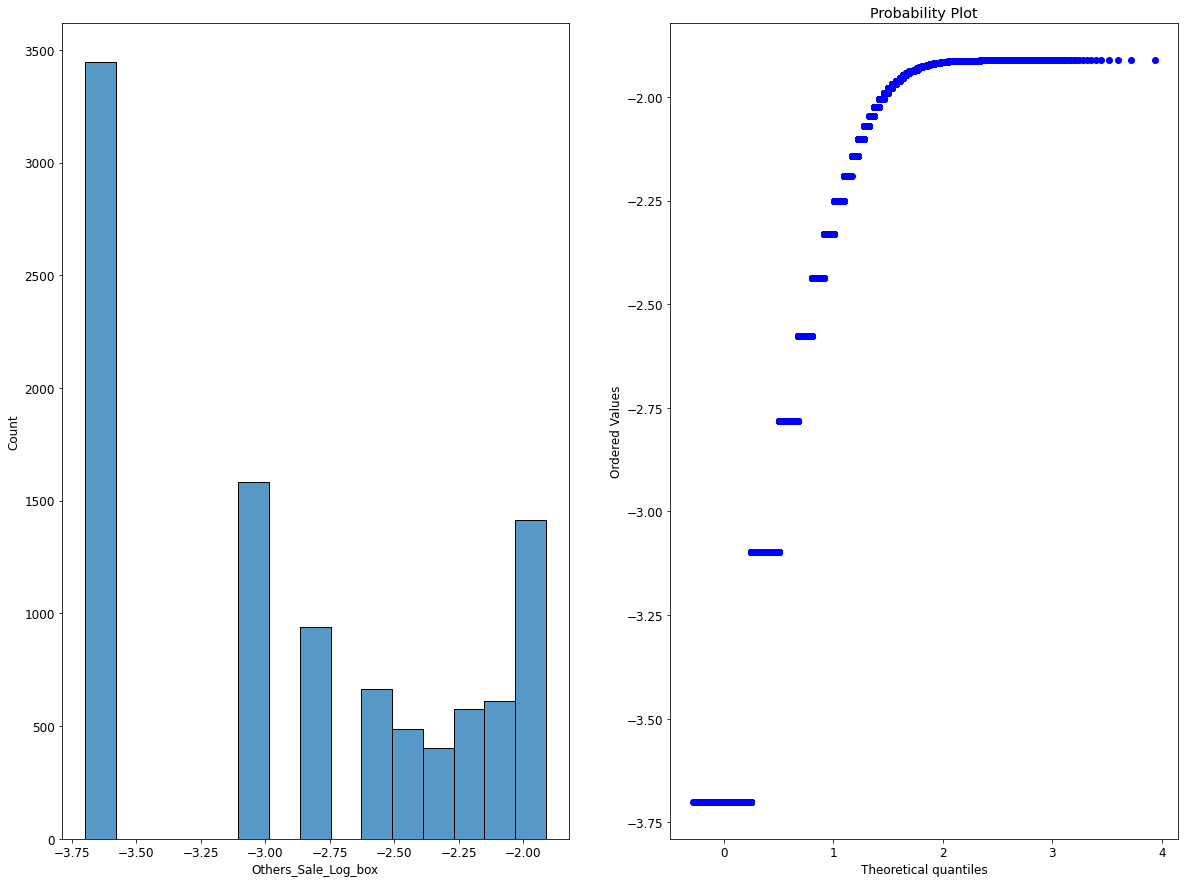

In [46]:
data['Others_Sale_Log_box'] = np.log(data.othersale_Boxcox)+1
check_gaussain(data,'Others_Sale_Log_box')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<IPython.core.display.Javascript object>

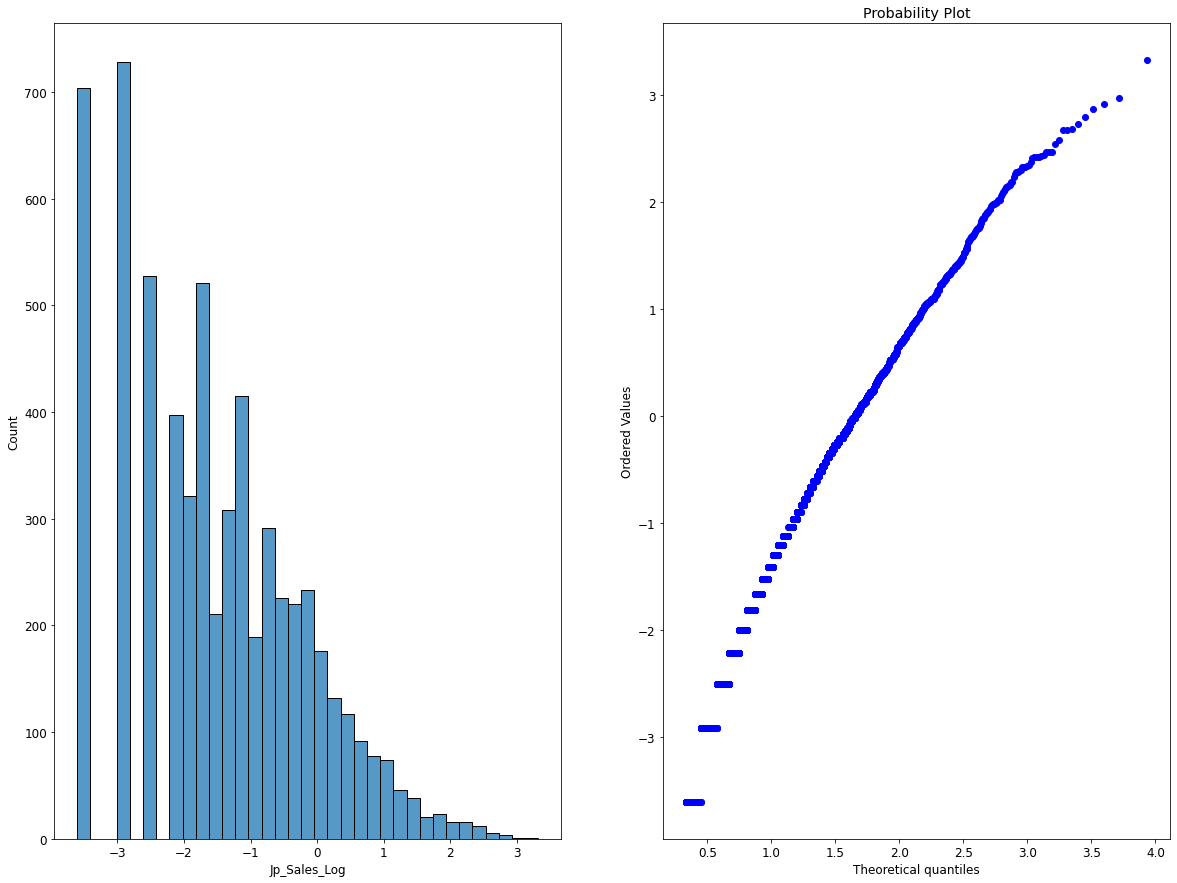

In [49]:
data['Jp_Sales_Log'] = np.log(data.JP_Sales)+1
check_gaussain(data,'Jp_Sales_Log')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

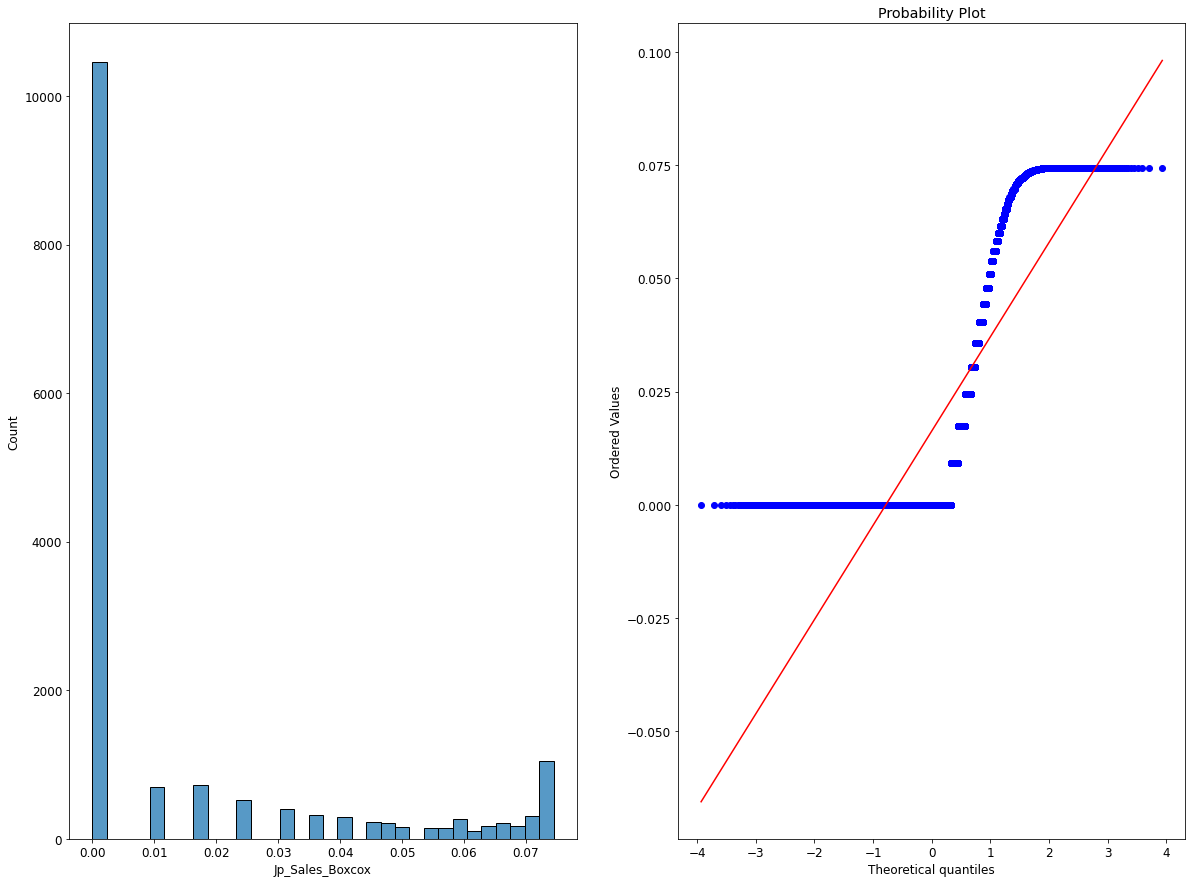

In [50]:
data['Jp_Sales_Boxcox'],parameters=stat.boxcox(data['JP_Sales']+1)
check_gaussain(data,'Jp_Sales_Boxcox')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

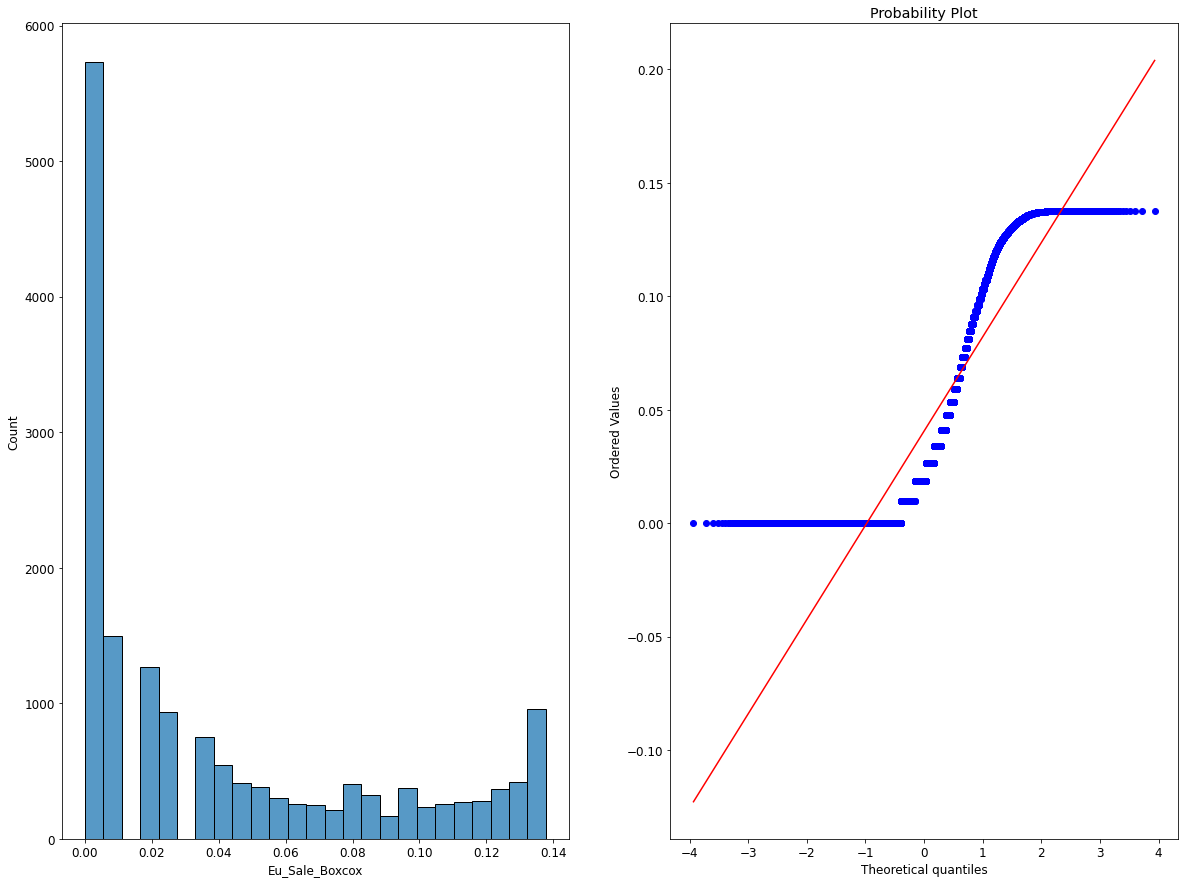

In [52]:
data['Eu_Sale_Boxcox'],parameters=stat.boxcox(data['EU_Sales']+1)
check_gaussain(data,'Eu_Sale_Boxcox') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

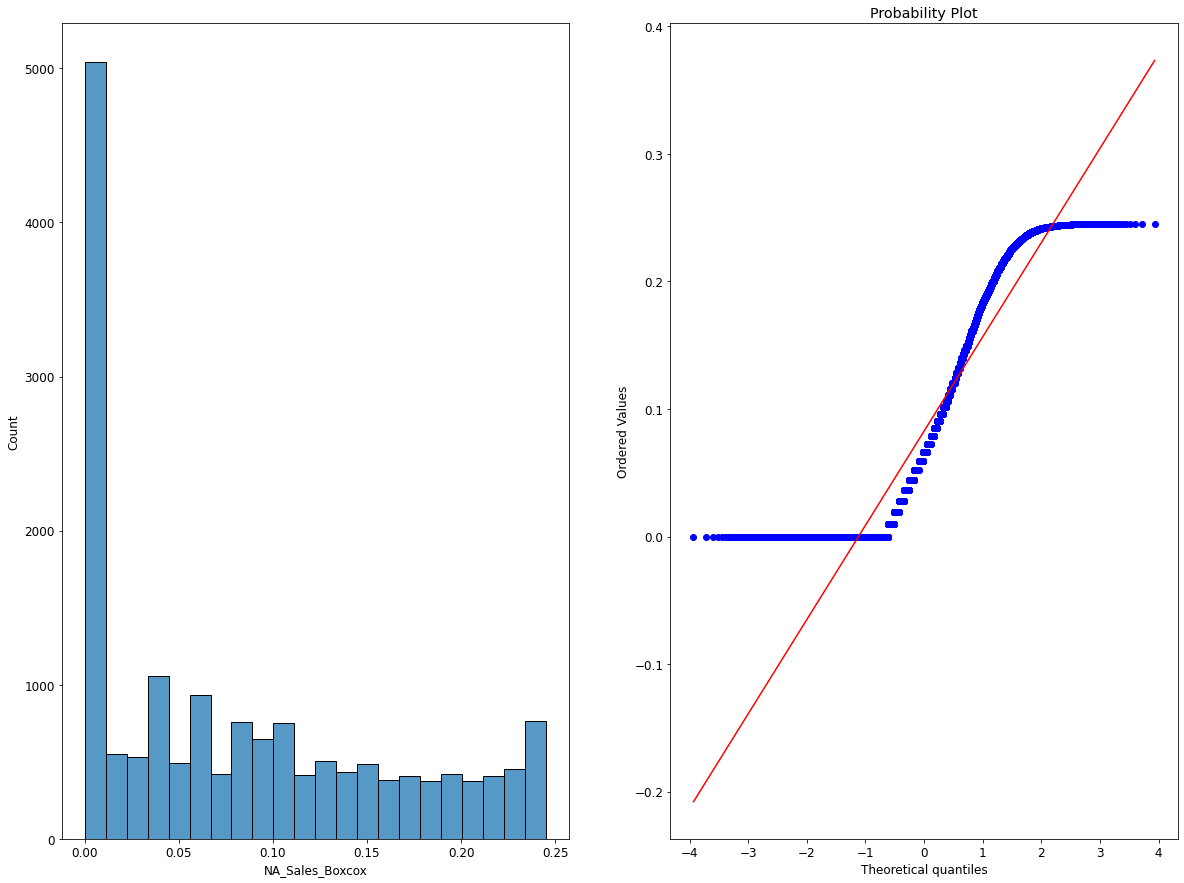

In [53]:
data['NA_Sales_Boxcox'],parameters=stat.boxcox(data['NA_Sales']+1)
check_gaussain(data,'NA_Sales_Boxcox') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

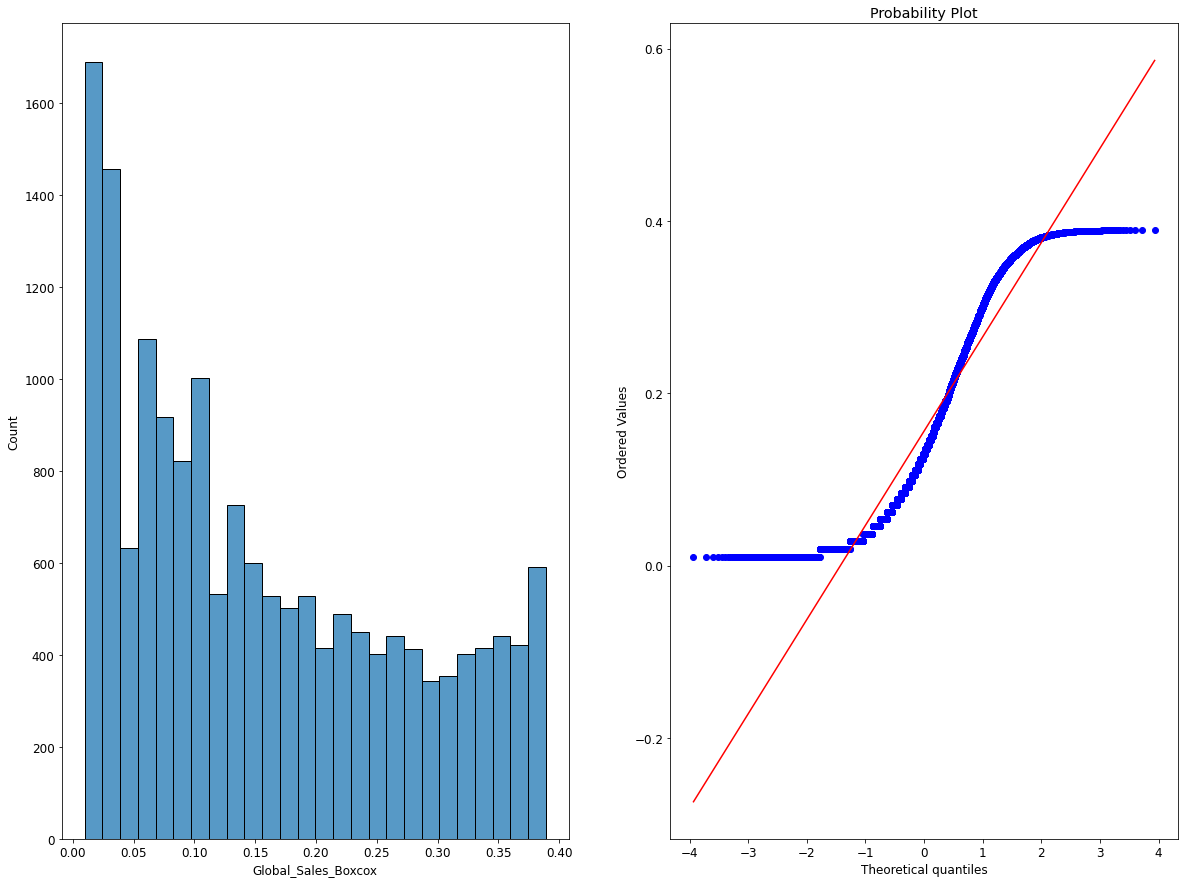

In [65]:
data['Global_Sales_Boxcox'],parameters=stat.boxcox(data['Global_Sales']+1)
check_gaussain(data,'Global_Sales_Boxcox') 

In [66]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Others_Sale_Log', 'othersale_Boxcox', 'Others_Sale_Log_box',
       'Jp_Sales_Log', 'Jp_Sales_Boxcox', 'Eu_Sale_Boxcox', 'NA_Sales_Boxcox',
       'Global_Sales_Boxcox'],
      dtype='object')

In [68]:
x_updated = data[['Jp_Sales_Boxcox', 'Eu_Sale_Boxcox', 'NA_Sales_Boxcox','othersale_Boxcox','Global_Sales_Boxcox']]
test = x_updated
test

,Jp_Sales_Boxcox,Eu_Sale_Boxcox,NA_Sales_Boxcox,othersale_Boxcox,Global_Sales_Boxcox
0,0.074454,0.137775,0.245097,0.054374,0.389178
1,0.074454,0.137772,0.245097,0.054372,0.389155
2,0.074454,0.137775,0.245095,0.054374,0.389146
3,0.074454,0.137775,0.245095,0.054374,0.389138
4,0.074454,0.137775,0.245089,0.054373,0.389132
...,...,...,...,...,...
16593,0.000000,0.000000,0.009751,0.000000,0.009824
16594,0.000000,0.000000,0.009751,0.000000,0.009824
16595,0.000000,0.000000,0.000000,0.000000,0.009824
16596,0.000000,0.009600,0.000000,0.000000,0.009824


In [69]:
#Now applying satandart Scaller over trhere here we go -
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_d = sc.fit_transform(test)

In [70]:
test_d_f = pd.DataFrame(test_d)
test_d_f

<IPython.core.display.Javascript object>

,0,1,2,3,4
0,2.288849,2.114710,2.065622,2.265221,2.042276
1,2.288849,2.114662,2.065620,2.265135,2.042074
2,2.288849,2.114710,2.065592,2.265221,2.041992
3,2.288849,2.114710,2.065591,2.265221,2.041919
4,2.288849,2.114710,2.065510,2.265212,2.041866
...,...,...,...,...,...
16593,-0.640364,-0.883730,-0.927521,-0.878792,-1.282690
16594,-0.640364,-0.883730,-0.927521,-0.878792,-1.282690
16595,-0.640364,-0.883730,-1.051536,-0.878792,-1.282690
16596,-0.640364,-0.674812,-1.051536,-0.878792,-1.282690


In [72]:
#now splitiing the data training & testing 
X = np.array(test_d_f[[0,1,2,3]])
y = np.array(test_d_f[4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=25)

In [77]:
linear = LinearRegression()

In [78]:
mse = cross_val_score(linear,xtrain,ytrain,cv=15,verbose=3,n_jobs=-1,scoring='neg_mean_squared_error')
mse 

<IPython.core.display.Javascript object>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    3.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished


array([-0.10136398, -0.10289597, -0.107615  , -0.08412239, -0.10596248,
       -0.10649493, -0.09897784, -0.09000871, -0.08383096, -0.08903366,
       -0.10489574, -0.09175612, -0.07642427, -0.09581604, -0.08609745])

In [79]:
mse.mean(0)

-0.09501970354840926

In [80]:
#now tarin the model using Linear Regression ---  Normal - Here We go ---
linear.fit(xtrain,ytrain)

LinearRegression()

In [81]:
linear.score(xtest,ytest)

0.907414713693497

In [82]:
#now using ridege & Lasso regression using hyper parmeter tuning
#now ridge & lasso regression
from sklearn.linear_model import Ridge
linear_ridge = Ridge()
param_grid = {
    'alpha' : [5,9,25,45,65,1e-20,1e-45,1e-3,1e-1,100],
    'max_iter': [10,25,36,12,4,2,55,65,29,39]
}

In [83]:
grid_cv = GridSearchCV(linear_ridge,param_grid=param_grid,cv=15,verbose=3,n_jobs=-1,refit=True,scoring='neg_mean_squared_error')
grid_cv.fit(xtrain,ytrain)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=15, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [5, 9, 25, 45, 65, 1e-20, 1e-45, 0.001, 0.1,
                                   100],
                         'max_iter': [10, 25, 36, 12, 4, 2, 55, 65, 29, 39]},
             scoring='neg_mean_squared_error', verbose=3)

In [84]:
grid_cv.best_score_

-0.09501961044076852

In [85]:
grid_cv.best_params_

{'alpha': 5, 'max_iter': 10}

In [94]:
grid_cv.score(xtest,ytest)

-0.09338690416403413

In [89]:
def timer(start_time=None):
    from datetime import datetime
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [90]:
from sklearn.linear_model import Lasso
la = Lasso()
param_grid = {
    'alpha' : [5,9,25,45,65,1e-20,1e-45,1e-3,1e-1,100,1,2,3,4,5,6,7,8,9],
    'max_iter': [10,25,36,12,4,2,55,65,29,39,68,99]
}
grid_cv_lasso = GridSearchCV(la,param_grid=param_grid,cv=15,verbose=3,n_jobs=-1,refit=True,scoring='neg_mean_squared_error')
start_time = timer(None)
grid_cv_lasso.fit(xtrain,ytrain)
timer(start_time)

Fitting 15 folds for each of 228 candidates, totalling 3420 fits
0.0 : 0.0 : 6.34


D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e+02, tolerance: 1.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [92]:
grid_cv_lasso.best_estimator_

Lasso(alpha=1e-20, max_iter=25)

In [93]:
grid_cv_lasso.best_score_

-0.09501970236285835

In [91]:
grid_cv_lasso.score(xtest,ytest)

-0.09338526755167499

In [95]:
from sklearn.linear_model import ElasticNet
param_grid = {
    'alpha' : [5,9,25,45,65,1e-20,1e-45,1e-3,1e-1,100,1,2,3,4,5,6,7,8,9],
    'max_iter': [10,25,36,12,4,2,55,65,29,39,68,99]
}
elas = ElasticNet()
grid_cv_elas = GridSearchCV(elas,param_grid=param_grid,cv=15,verbose=3,n_jobs=-1,refit=True,scoring='neg_mean_squared_error')
start_time = timer(None)
grid_cv_elas.fit(xtrain,ytrain)
timer(start_time)

Fitting 15 folds for each of 228 candidates, totalling 3420 fits
0.0 : 0.0 : 2.87


D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e+02, tolerance: 1.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [96]:
grid_cv_elas.best_estimator_

ElasticNet(alpha=1e-20, max_iter=25)

In [97]:
grid_cv_elas.best_score_

-0.09501970236285835

In [98]:
grid_cv_elas.score(xtest,ytest)

-0.09338526755167499